# Model Fit & Inference

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

import altair as alt

alt.renderers.enable("mimetype")
alt.renderers.set_embed_options(
    theme = "fivethirtyeight"
)

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("../data/clean_data.csv")
df

,sample,rs190723053,rs184643004,rs184107193,rs78466144,rs200750454,rs149876288,rs201969461,rs140138610,rs77203822,...,rs115279472,rs400140,rs28637180,rs140094480,rs114462634,rs111704908,rs114631634,rs141938398,population_code,superpopulation_code
0,HG00096,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,GBR,EUR
1,HG00097,0,2,0,2,2,2,0,1,1,...,0,1,0,0,0,0,0,0,GBR,EUR
2,HG00099,0,2,0,1,1,1,2,2,2,...,0,2,0,0,0,0,0,0,GBR,EUR
3,HG00100,0,0,0,0,0,2,1,0,1,...,0,1,0,0,0,0,0,0,GBR,EUR
4,HG00101,0,1,0,1,1,1,2,1,2,...,0,1,0,0,0,0,0,0,GBR,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,TSI,EUR
1088,NA20818,0,0,0,1,0,2,1,0,2,...,0,0,0,0,0,0,0,0,TSI,EUR
1089,NA20819,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,TSI,EUR
1090,NA20826,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,TSI,EUR


In [71]:
m, n = df.shape

print(f"Number of Samples: {m}")
print(f"Number of Alleles: {n}")

Number of Samples: 1092
Number of Alleles: 19776


In [72]:
non_allele = ["sample", "population_code", "superpopulation_code"]

df_alleles = df.drop(non_allele, axis = 1)

genotypes = df_alleles.to_numpy()

In [74]:
# I don't have much RAM on my macbook so
# taking ever 5th allele to cut down on
# memory usage.

genotype_small = genotypes[:, ::5]
m, n = genotype_small.shape

print(f"New Number of Samples: {m}")
print(f"New Number of Alleles: {n}")

New Number of Samples: 1092
New Number of Alleles: 3955


In [76]:
# First mean normalize your data. That is,
# we substract the mean (dimension wise)
# which will center our data around the
# origin.

# Calculate the mean.
mean = np.mean(genotype_small, axis = 0)

# Subtract the mean.
genotypes_normalized = genotype_small - mean

# Compute the covariance matrix of our data.
covariance = np.cov(genotypes_normalized, rowvar = False)

In [77]:
# Compute the SVD of our covariance matrix.
s, v, d = np.linalg.svd(covariance, full_matrices = False)

print(f"s: {s.shape}")
print(f"v: {v.shape}")
print(f"d: {d.shape}")

s: (3955, 3955)
v: (3955,)
d: (3955, 3955)


In [78]:
# The eigenvalues are already sorted in descending
# order. Because the covariance matrix is positive
# semi-definite, s = d.T, and we can just take the
# leading two principle components straight from s. 

PC1 = s[:, 0]
PC2 = s[:, 1]

In [79]:
print(f"PC1: {PC1.shape}")
print(f"PC2: {PC2.shape}")
print(f"Genotypes: {genotypes_normalized.shape}")

PC1: (3955,)
PC2: (3955,)
Genotypes: (1092, 3955)


In [80]:
# Now we do a change of basis of our original data
# with our PC1 and PC2 forming the new space. 

PC1_plot = genotypes_new.dot(PC1)
PC2_plot = genotypes_new.dot(PC2)

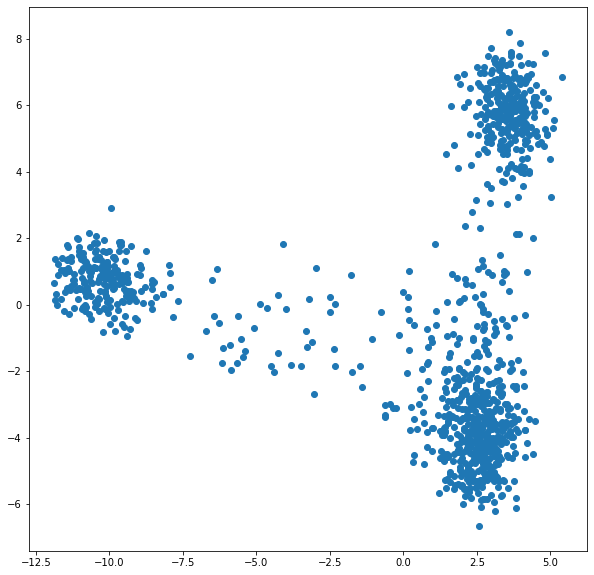

In [82]:
# Now lets visualize our data with this
# change of basis applied.

fig = plt.figure(figsize = (10, 10))

plt.scatter(PC1_plot, PC2_plot)

plt.show()

In [62]:
pop_test = df["superpopulation_code"]

print(np.unique(pop_test))

['AFR' 'AMR' 'ASN' 'EUR']


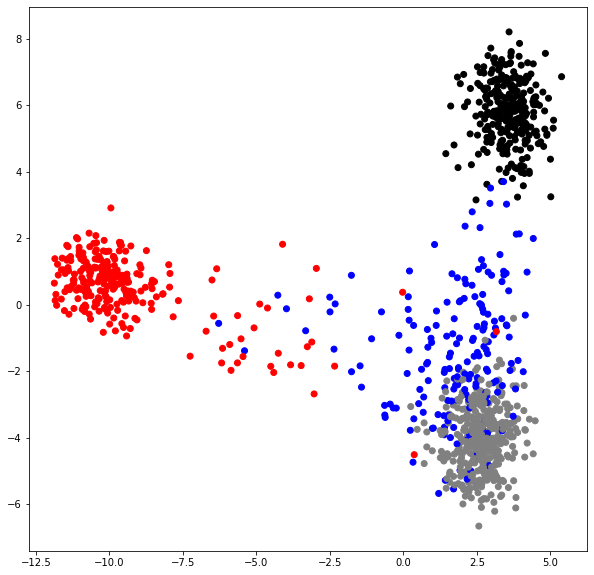

In [84]:
lookup = {
    "AFR": "red",
    "AMR": "blue",
    "ASN": "black",
    "EUR": "grey"
}

# Convert each anscestory to a color
# according to the map above.
colors = pop_test.map(lookup).tolist()

fig = plt.figure(figsize = (10, 10))

plt.scatter(PC1_plot, PC2_plot, color = colors)

plt.show()